In [ ]:
!pip install spotify

In [ ]:
# download dataset
!wget https://raw.githubusercontent.com/realsanjeev/LGMVIP-Data-Science/main/BEGINNER%20LEVEL%20TASK/MUSIC%20RECOMMENDATION%20SYSTEM/SpotifyFeatures.csv?token=GHSAT0AAAAAACF7QFZQA2G6IGCWPXI6223UZHBX73Q

--2023-08-20 09:03:11--  https://raw.githubusercontent.com/realsanjeev/LGMVIP-Data-Science/main/BEGINNER%20LEVEL%20TASK/MUSIC%20RECOMMENDATION%20SYSTEM/SpotifyFeatures.csv?token=GHSAT0AAAAAACF7QFZQA2G6IGCWPXI6223UZHBX73Q
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-08-20 09:03:11 ERROR 404: Not Found.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
# check null value if present in feature
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
# remove the record with null value
df.dropna(inplace=True)

In [ ]:
# define  correlation
df.corr(numeric_only=True).style.background_gradient(cmap="coolwarm").format(precision=2)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.00,-0.38,0.26,0.00,0.25,-0.21,-0.17,0.36,-0.15,0.08,0.06
acousticness,-0.38,1.00,-0.36,0.01,-0.73,0.32,0.07,-0.69,0.15,-0.24,-0.33
danceability,0.26,-0.36,1.00,-0.13,0.33,-0.36,-0.04,0.44,0.13,0.02,0.55
duration_ms,0.00,0.01,-0.13,1.00,-0.03,0.08,0.02,-0.05,-0.02,-0.03,-0.14
energy,0.25,-0.73,0.33,-0.03,1.00,-0.38,0.19,0.82,0.15,0.23,0.44
instrumentalness,-0.21,0.32,-0.36,0.08,-0.38,1.00,-0.13,-0.51,-0.18,-0.10,-0.31
liveness,-0.17,0.07,-0.04,0.02,0.19,-0.13,1.00,0.05,0.51,-0.05,0.01
loudness,0.36,-0.69,0.44,-0.05,0.82,-0.51,0.05,1.00,-0.00,0.23,0.40
speechiness,-0.15,0.15,0.13,-0.02,0.15,-0.18,0.51,-0.00,1.00,-0.08,0.02
tempo,0.08,-0.24,0.02,-0.03,0.23,-0.10,-0.05,0.23,-0.08,1.00,0.13


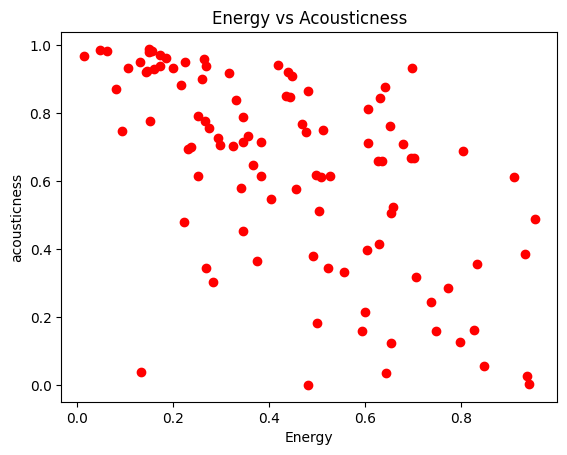

In [ ]:
plt.title("Energy vs Acousticness")
plt.scatter(df["energy"][:100], df["acousticness"][:100], c='r')
plt.xlabel("Energy")
plt.ylabel("acousticness")
plt.show()

**Conclusion**: Energy and acousticness is inveresly related(negative corelation). When One increases other decreases and vice versa.

In [ ]:
numerical_datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# get numerical features column name
numerical_features = df.select_dtypes(numerical_datatypes).columns
numerical_features

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

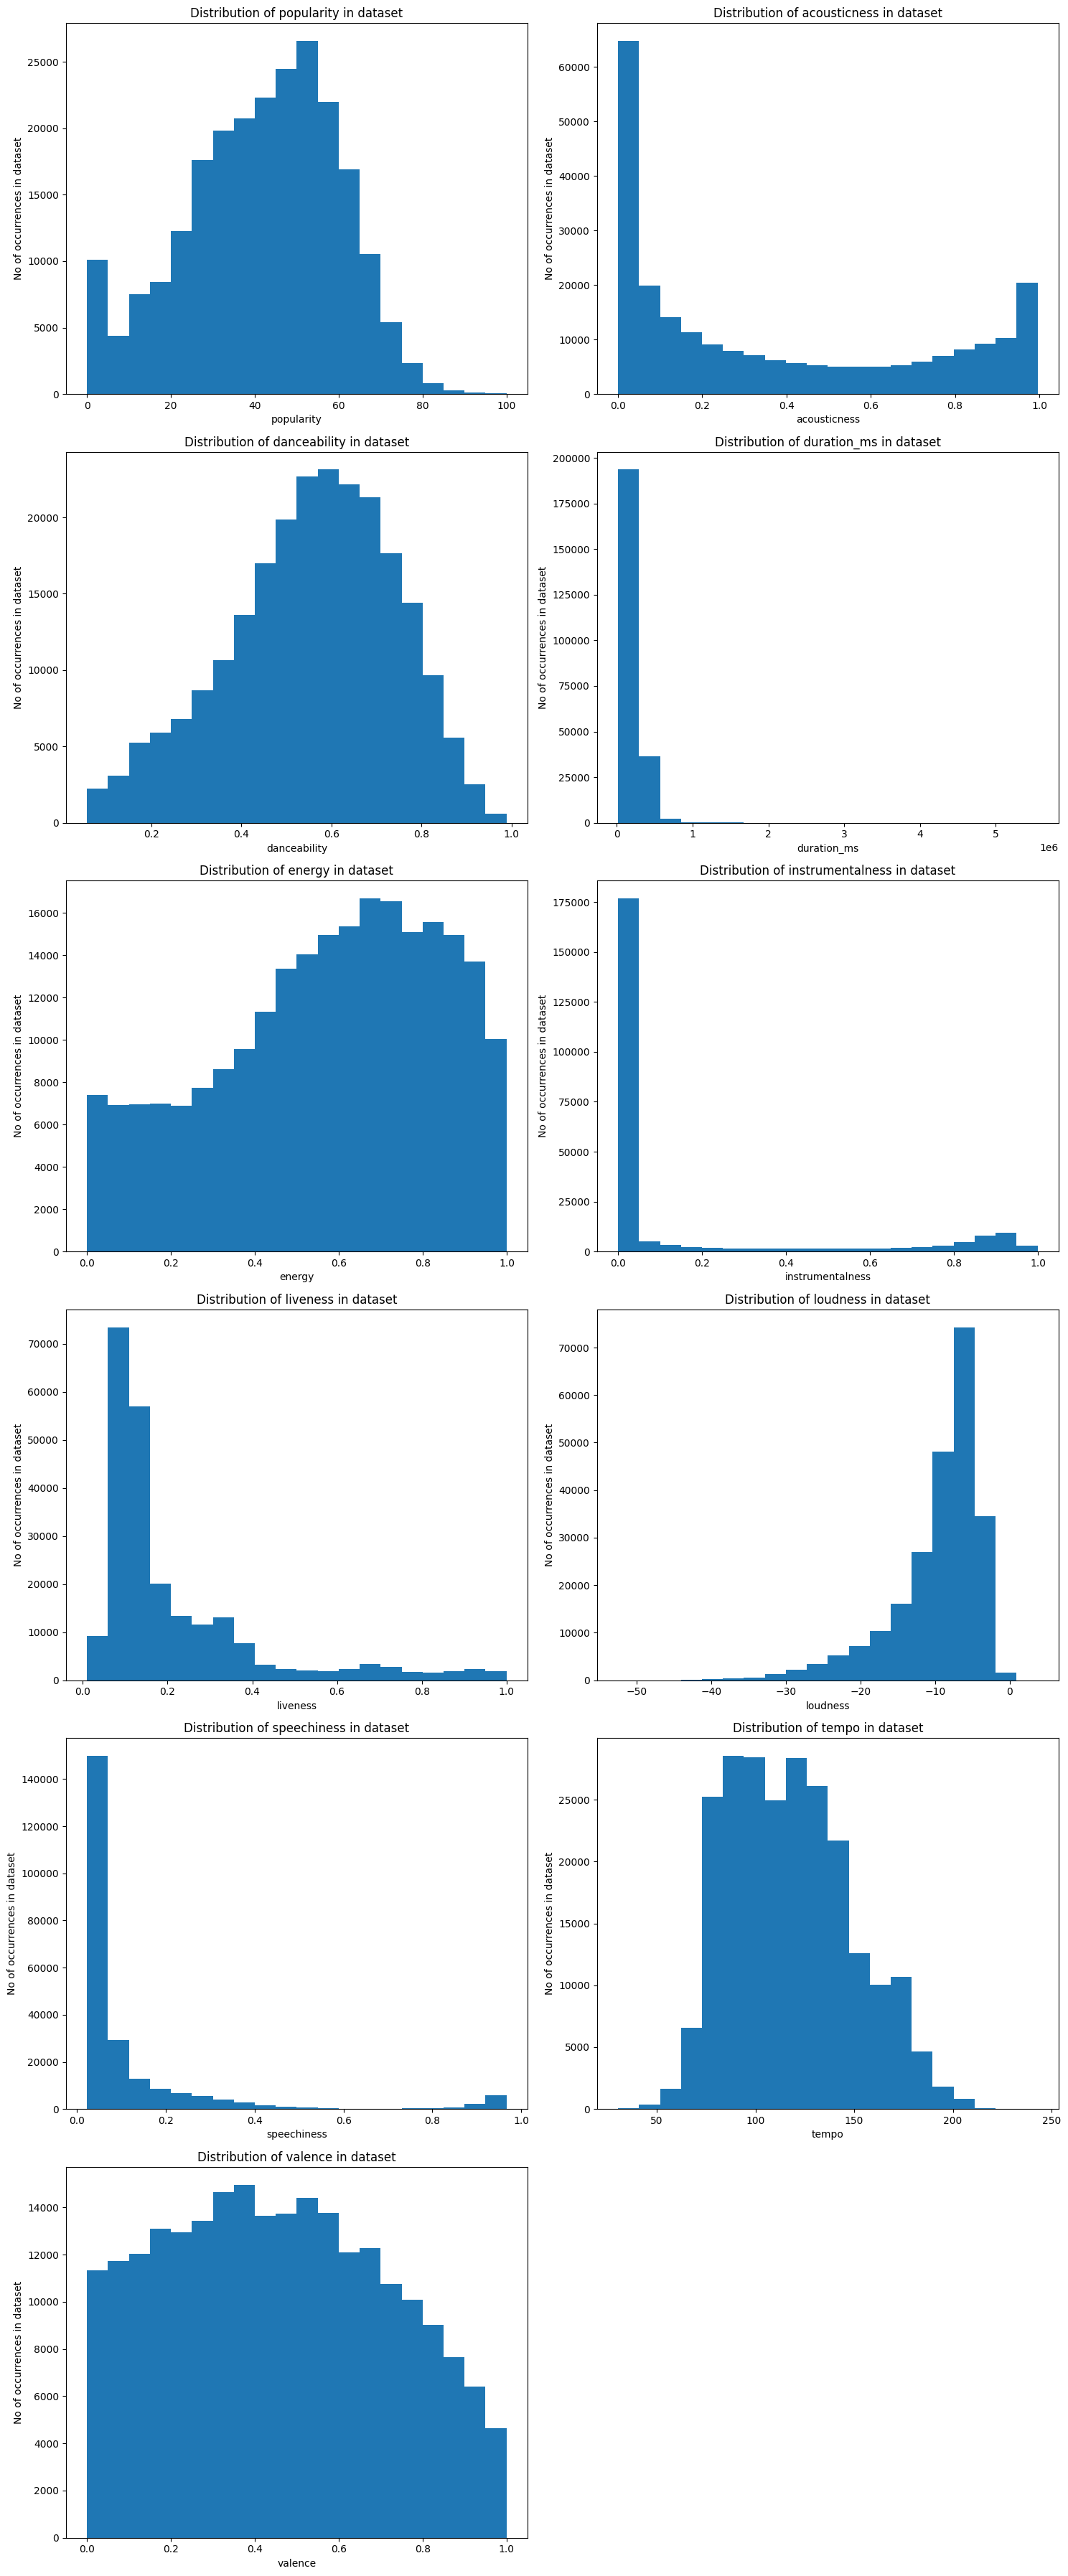

In [ ]:
num_rows = (len(numerical_features) + 1) // 2  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))  # Adjust figsize

for idx, feature in enumerate(numerical_features):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    ax.hist(df[feature], bins=20)
    ax.set_title(f"Distribution of {feature} in dataset")
    ax.set_xlabel(feature)
    ax.set_ylabel("No of occurrences in dataset")

# Remove any empty subplots
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [ ]:
# normalize the dataset
normalize = df.select_dtypes(include=numerical_datatypes)  # Assuming numerical_datatypes is defined
scaler = StandardScaler()

normalized_data = scaler.fit_transform(normalize)
normalized_df = pd.DataFrame(normalized_data, columns=normalize.columns)

In [ ]:
normalized_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618
...,...,...,...,...,...,...,...,...,...,...,...
232720,-0.116961,-1.028056,0.714601,0.766109,0.542948,1.306938,-0.658233,-0.176072,-0.480628,-0.068759,1.949833
232721,-0.171936,-0.946143,1.242596,0.397901,0.425281,-0.486912,0.110912,0.437780,-0.469308,-0.124166,1.976749
232722,0.322844,1.500814,-0.201309,-0.573103,-0.576788,-0.489819,-0.607797,0.214712,0.146805,-1.085205,1.376899
232723,0.157917,-0.300367,1.027088,-0.106615,0.504991,-0.489819,0.595095,0.405603,0.136025,-0.570752,0.131056


In [ ]:
kmeans_model = KMeans(n_clusters=12, n_init=20)
features = kmeans_model.fit_predict(normalize)

df['features'] = features

In [30]:
class MusicRecommendation(object):
  def __init__(self, dataset):
    self.dataset = dataset

  def recommend_music(self, musics, amount=1):
    distance = []
    music = self.dataset[(self.dataset.track_name.str.lower() == musics.lower())].head(1).values[0]
    records = self.dataset[self.dataset.track_name.str.lower() != musics.lower()]
    print("len of records", len(records))
    for musics in tqdm(records.values):
      d = 0
      for col in np.arange(len(records.columns)):
        try:
          if not col in [0, 1, 2, 3, 7, 10, 13]:
            d = d + np.absolute(float(music[col]) - float(musics[col]))
        except:
          continue
      distance.append(d)
      if len(distance) % 10000==0:
        print(f"Searched {len(distance)} records.....")

    records.loc[:, 'distance'] = distance
    records = records.sort_values('distance')
    return records.head(amount)[['track_name', 'genre']]

recommendation_handle = MusicRecommendation(df)
recommendation_handle.recommend_music("Lovers Rock", 10)

len of records 232719


  0%|          | 0/232719 [00:00<?, ?it/s]

Searched 10000 records.....
Searched 20000 records.....
Searched 30000 records.....
Searched 40000 records.....
Searched 50000 records.....
Searched 60000 records.....
Searched 70000 records.....
Searched 80000 records.....
Searched 90000 records.....
Searched 100000 records.....
Searched 110000 records.....
Searched 120000 records.....
Searched 130000 records.....
Searched 140000 records.....
Searched 150000 records.....
Searched 160000 records.....
Searched 170000 records.....
Searched 180000 records.....
Searched 190000 records.....
Searched 200000 records.....
Searched 210000 records.....
Searched 220000 records.....
Searched 230000 records.....


<ipython-input-30-f1ad522fa212>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  records.loc[:, 'distance'] = distance


,track_name,genre
10994,Real Wild Child (Wild One),Alternative
41946,Tupelo,Folk
142813,Tupelo,Indie
155857,Tupelo,Rock
225225,Still The One,Rock
42767,Still The One,Folk
131124,Laika,Reggae
6302,The Time I've Wasted,Alternative
42911,Splintered,Folk
130978,War,Reggae
